# INTRODUCCIÓN

Para esta parte vamos a analizar unos datos que se encuentran en archivos csv. Donde encontraremos y analizaremos cuales son las empresas de taxis que mas relevancia tienen, al igual que los barrios donde más se moviliza la gente y por último analizaremos la demora en los viajes dependiendo del clima que hay en determinados días.

Esta información puede ser importante para las empresas en caso de querer realizar alguna campaña de promoción o también para saber que barrios pueden ser potenciales mercados donde no se están realizando muchos viajes pero que podrían mejorar las cifras con una campaña acorde a las necesidades de las personas que allí habitan. 


## Importa los archivos

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

company_trips = pd.read_csv('moved_project_sql_result_01.csv')
town_trips = pd.read_csv('moved_project_sql_result_04.csv')
loop_trips = pd.read_csv('moved_project_sql_result_07.csv')

## Estudia los datos que contienen

In [9]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


## Asegurarte de que los tipos de datos sean correctos

Los tipos de datos estan correctos

In [10]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


## Identificar los 10 principales barrios en términos de finalización del recorrido

In [11]:
town_trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [12]:
town_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


## Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

<Axes: title={'center': 'Empresas de taxis y numero de viajes'}, xlabel='Empresa', ylabel='Numero de Viajes'>

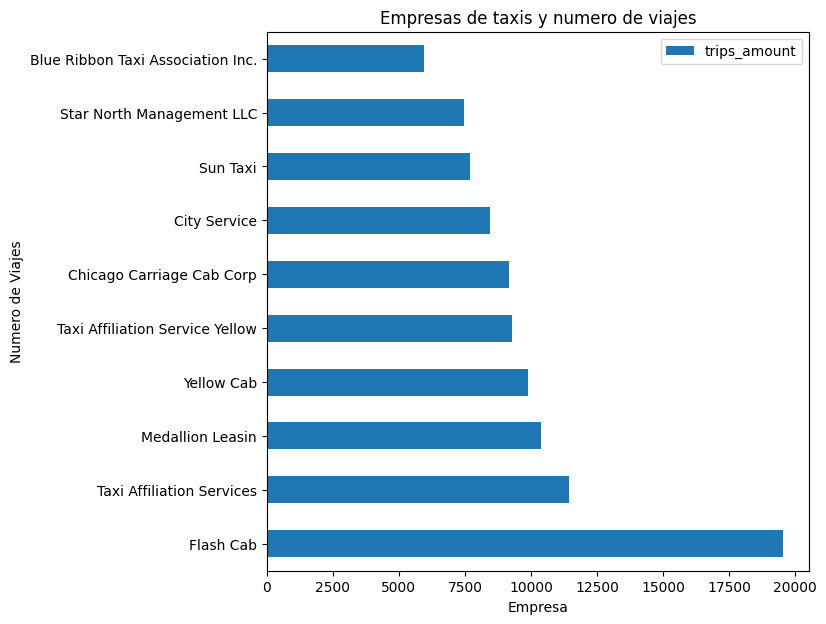

In [13]:
ten_company = company_trips.head(10)
ten_company.plot(kind='barh', x='company_name', y='trips_amount', title='Empresas de taxis y numero de viajes', xlabel='Empresa', ylabel='Numero de Viajes', figsize=[7,7])

In [14]:
first_ten = town_trips.head(10)

<Axes: title={'center': '10 Barrios principales x No. de finalizaciones'}, xlabel='Barrio', ylabel='Numero de llegadas'>

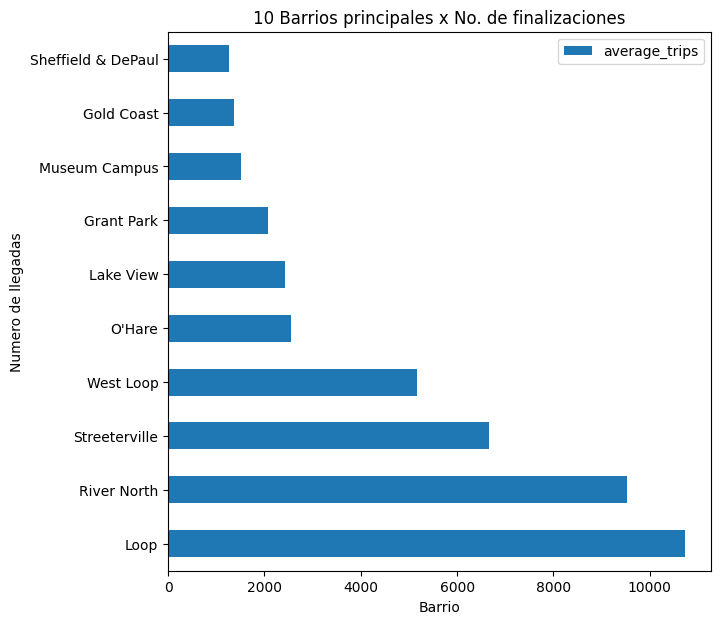

In [15]:
first_ten.plot(kind='barh', x='dropoff_location_name', y='average_trips', title='10 Barrios principales x No. de finalizaciones', xlabel='Barrio', ylabel='Numero de llegadas', figsize=[7,7])

## Sacar conclusiones basadas en cada gráfico y explicar los resultados

- La empresa que se encuentra mejor posicionanda es por numero de viajes es Flash Cab.
- Flash Cab realiza 42% mas de viajes que la segunda empresa en el listado que es Taxi afiliation services.
- El destino en chicago donde mas finalizan viajes es en Loop.

## Prueba de hipotesis

In [19]:
loop_trips = pd.read_csv('moved_project_sql_result_07.csv')
loop_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
loop_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

- Cómo planteaste las hipótesis nula y alternativa

Hipótesis nula: No hay diferencia significativa en la duración promedio de los viajes entre sábados lluviosos y sábados no lluviosos.

Hipótesis alternativa: La duración promedio de los viajes en sábados lluviosos es diferente a la de los sábados no lluviosos.

- Qué criterio usaste para probar las hipótesis y por qué

Para probar la hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos, utilicé una prueba t de Student para muestras independientes.

Porque se quiere comparar la duración promedio de los viajes en dos condiciones diferentes: sábados lluviosos vs. sábados no lluviosos.

La prueba t de Student es adecuada cuando se comparan las medias de dos muestras independientes.

In [20]:
loop_trips.head(30)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [21]:
loop_trips['start_ts'] = pd.to_datetime(loop_trips['start_ts'])

loop_trips['day_of_week'] = loop_trips['start_ts'].dt.dayofweek

saturdays_df = loop_trips[loop_trips['day_of_week'] == 5]

rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'].str.contains("Bad", case=False, na=False)]

non_rainy_saturdays = saturdays_df[saturdays_df['weather_conditions'].str.contains("Good", case=False, na=False)]

avg_duration_rainy = rainy_saturdays['duration_seconds'].mean()

avg_duration_non_rainy = non_rainy_saturdays['duration_seconds'].mean()

n_rainy = len(rainy_saturdays)
n_non_rainy = len(non_rainy_saturdays)

alpha = 0.05

results = st.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var=False)
print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula: Hay diferencia significativa en la duración de los viajes.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que la duración de los viajes cambia.")

print("Duración promedio en sábados lluviosos:", avg_duration_rainy)
print("Duración promedio en sábados sin lluvia:", avg_duration_non_rainy)

valor p:  6.738994326108734e-12
Se rechaza la hipótesis nula: Hay diferencia significativa en la duración de los viajes.
Duración promedio en sábados lluviosos: 2427.2055555555557
Duración promedio en sábados sin lluvia: 1999.6756756756756


## Como desarrolle la prueba de hipótesis:

- Convertí la columna de tiempo a formato datetime para facilitar su manipulación.
- Luego extraje el día de la semana (sábado = 5 en pandas, donde lunes = 0 y domingo = 6).
- Filtre solo los registros correspondientes a los sábados.
- Separare los sábados lluviosos (donde la condición climática contiene "Bad").
- Separare los sábados que no son lluviosos con la condicion 'Good'.
- Calcule la duración promedio de los viajes en sábados lluviosos.
- Calcule la duración promedio de los viajes en sábados sin lluvia.
- Nivel de significación(Alpha)=0,05.
- Aplique la prueba t de Student para comparar las medias.
- Determine el resultado basado en Alpha.
- Indique los segundos promedio de viaje con lluvia y sin lluvia.

Despues de realizar la prueba de hipótesis, determinamos que los viajes desde Loop hacia el Aeropuerto Internacional O'Hare son mas demorados en dias lluviosos por aproximadamente 428 segundos mas o 7 minutos mas. 
